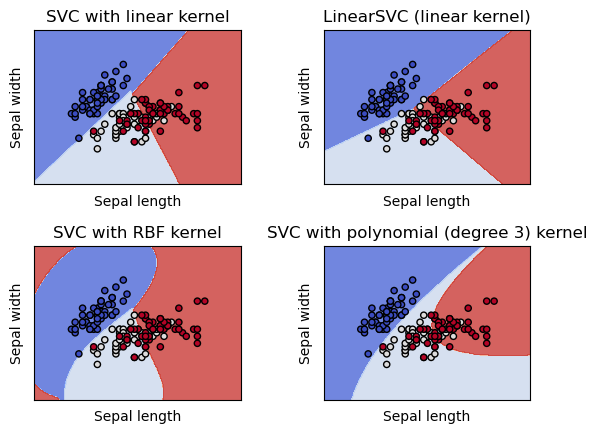

In [1]:
# From https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

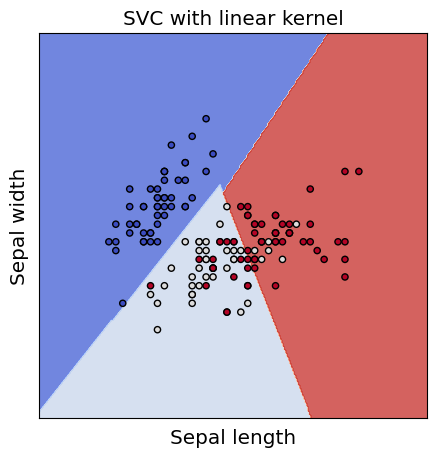

In [9]:
clf= svm.SVC(kernel="linear", C=C, probability=True)
clf.fit(X, y)
title=titles[0]
fig, ax = plt.subplots()
if True:
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)


In [27]:
results = []
for p in np.arange(.01, .99, .01):
    probs = clf.predict_proba(X)
    PRED = probs[:,0] > p 
    TP = ((PRED == 1) & (y == 1) ) .sum()
    FP = ((PRED == 1) & (y == 0)) .sum()
    TN = ((PRED == 0) & (y == 0)) .sum()
    FN = ((PRED == 0) & (y == 1)) .sum()
    results.append (  (TP, FP, TN, FN) )
results = np.array(results)

In [31]:
TPR = results[:, 0] / ( results[:, 0] + results[:,3]) 
FPR = results[:,2] /  ( results [:,2] + results[ :, 1]) 

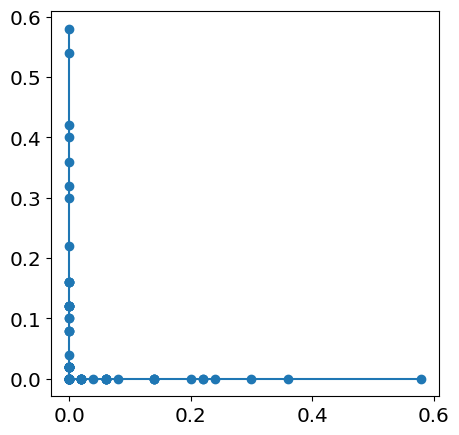

In [36]:
plt.plot(TPR, FPR, 'o-')
#plt.xlim((0,0.1))
#plt.ylim((0,0.1))

In [33]:
TPR.shape

(98,)

In [3]:
# https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (5, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


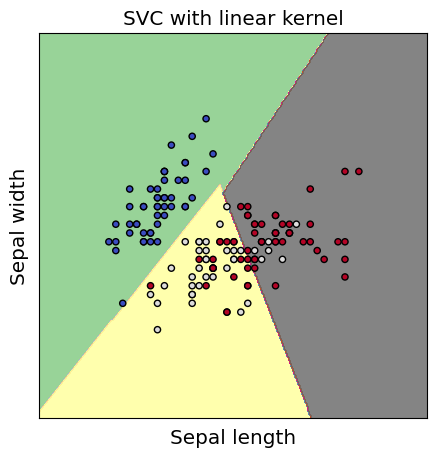

In [4]:
clf= svm.SVC(kernel="linear", C=C)
clf.fit(X, y)
title=titles[0]
fig, ax = plt.subplots()
if True:
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.Accent, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.savefig("SVC.eps")
plt.savefig("SVC.png")

In [6]:
clf?

Type:        SVC
String form: SVC(kernel='linear')
File:        ~/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/svm/_classes.py
Docstring:  
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrative documentation:
:ref:`svm_kernels`.

Read more in the :ref:`User Guide <svm_classification>`.

Parameters
----------
C : float, default=1.0
    Regularization parameter. The strength o

In [17]:
# Set up notebook

%matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="white")

# Load the Iris Data
iris = sns.load_dataset("iris")



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


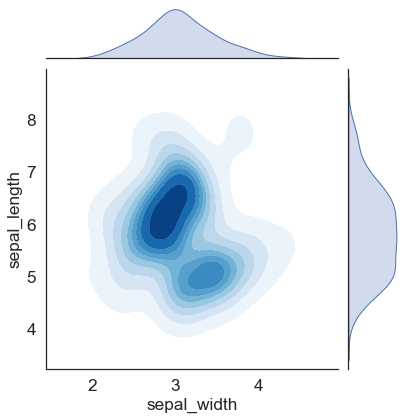

In [26]:
# Plot two-dimension data using a Seaborn jointplot, which 
# can show 1D and 2D KDE plots, for both the joint distribution 
# and each dimension

ax = sns.jointplot(x='sepal_width', y='sepal_length', data=iris, 
                   kind='kde', stat_func=None, cmap="Blues",
                   xlabel="Sepal length", fill=True)
plt.savefig("DENSITY.eps")
plt.savefig("DENSITY.png")

In [29]:
a= [1,2,3,4]

In [30]:
a.head()

AttributeError: 'list' object has no attribute 'head'

In [44]:
a = pd.DataFrame( {  "a":  [1,2,3,np.NaN, 4]})

In [33]:
a


,a
0,1.0
1,2.0
2,3.0
3,NaN
4,4.0


In [36]:
a[np.isnan(a)] = 0


In [37]:
a

,a
0,1.0
1,2.0
2,3.0
3,0.0
4,4.0


In [39]:
a.a = 0

In [40]:
a.a

0    0
1    0
2    0
3    0
4    0
Name: a, dtype: int64

In [47]:
a.a is np.NaN


False